# Customer Segmentation

### Introduction

In this guided project, we will apply unsupervised machine learning techniques to solve a real-world business problem. We have been provided with a dataset containing information about clients from a credit card company. Our objective is to partition the company's customers into distinct groups so that tailored business strategies can be developed for each segment.

**Scenario and Goal**

We are acting as data scientists working for a credit card company. Our goal is to identify meaningful customer segments using clustering techniques. These segments will help the company personalize services, marketing strategies, and customer engagement efforts.

**Background**

- The data engineering team has already performed most of the data cleaning.
- After discussions with the Data Science coordinator, it was decided that the K-means clustering algorithm is the most suitable approach for this task.
- The company expects the final deliverables to include a cluster assignment for each customer, along with clear explanations of what differentiates each group.

**Steps We’ll Follow**

To accomplish this, we’ll go through the following steps:
- Explore and analyze the dataset.
- Prepare the data for modeling.
- Determine the optimal number of clusters.
- Apply the K-means algorithm to segment the data.
- Interpret the clusters and explain their defining characteristics.

**Dataset Overview**

We’ll be working with a dataset containing information about the company’s customers. Below are the columns and their descriptions:

- `customer_id`: Unique identifier for each customer  
- `age`: Age of the customer (in years)  
- `gender`: Customer gender ("M" or "F")  
- `dependent_count`: Number of dependents the customer has  
- `education_level`: Educational attainment (e.g., "High School", "Graduate")  
- `marital_status`: Marital status (e.g., "Single", "Married")  
- `estimated_income`: Projected income estimated by the data science team  
- `months_on_book`: Number of months the individual has been a customer  
- `total_relationship_count`: Number of interactions the customer has had with the company  
- `months_inactive_12_mon`: Number of months the customer was inactive in the past year  
- `credit_limit`: Customer’s credit limit  
- `total_trans_amount`: Total amount spent using the credit card  
- `total_trans_count`: Total number of transactions made with the card  
- `avg_utilization_ratio`: Average daily utilization ratio of the credit card

### Exploratory Data Analysis - EDA

Let's begin by importing our libraries and data, and then proceed with our Exploratory Data Analysis (EDA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

np.random.seed(42)

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
customers = pd.read_csv('customer_segmentation.csv')

In [3]:
customers

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


In [4]:
customers.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

### Correlations

So far, everything we've observed in the data seems to be clean and in order. Next, we will generate a correlation matrix of all the columns to see which ones have relationships we may want to pay attention to later in the project. To do that, we will need to convert the three categorical columns—`gender`, `education_level`, and `marital_status`—into a numeric form, which ensures that the correlation and future calculations run correctly. We will also filter the map to only include the correlations that are above `0.3`, so we will be able to quickly identify those that are stronger.

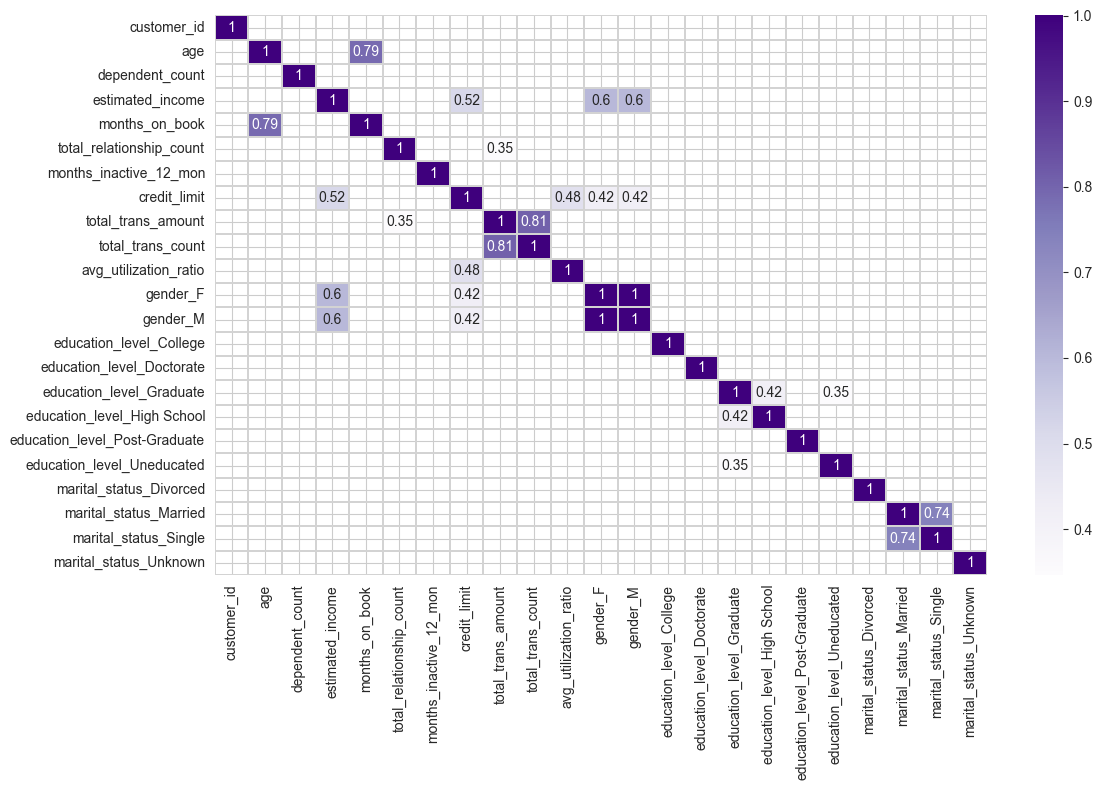

In [6]:
# preparing the data
correlation_data = customers.copy()
correlation_data = pd.get_dummies(correlation_data, drop_first=False)
bool_cols = correlation_data.select_dtypes(include='bool').columns
correlation_data[bool_cols] = correlation_data[bool_cols].astype(int)

# generating correlation map
correlations = abs(correlation_data.corr())
plt.figure(figsize=(12,8))
sns.heatmap(
    correlations[correlations > 0.3],
    annot=True,
    cmap="Purples",
    linecolor='lightgrey',
    linewidths=0.002815
)
plt.tight_layout()

Some interesting relationships we observed include:

- `months_on_book` & `age`
- `credit_limit` & `estimated_income`
- `total_trans_amount` & `total_relationship_count`
- `total_trans_count` & `total_trans_amount`
- `avg_utilization_ratio` & `credit_limit`
- `gender_F` & `estimated_income`
- `gender_F` & `credit_limit`
- `gender_M` & `estimated_income`
- `gender_M` & `credit_limit`
- `education_level_High School` & `education_level_Graduate`

A few of these correlations are expected. For example, the relationship between `education_level_High School` and `education_level_Graduate` makes sense. Others, such as the link between `months_on_book` and `age`, or between `total_trans_amount` and `total_relationship_count`, stood out as particularly noteworthy. We’ll keep these patterns in mind as we move forward. Who knows? They might prove useful later on.

### Distributions – Numeric

Let’s take a closer look at how the values in our dataset are distributed, starting with the numeric columns. Our first step is to filter the data to include only numeric columns. Once that’s done, we’ll use box plots to visualize the distributions.

In [7]:
numeric_data = customers.select_dtypes(include=['number'])

In [8]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   dependent_count           10127 non-null  int64  
 3   estimated_income          10127 non-null  int64  
 4   months_on_book            10127 non-null  int64  
 5   total_relationship_count  10127 non-null  int64  
 6   months_inactive_12_mon    10127 non-null  int64  
 7   credit_limit              10127 non-null  float64
 8   total_trans_amount        10127 non-null  int64  
 9   total_trans_count         10127 non-null  int64  
 10  avg_utilization_ratio     10127 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 870.4 KB


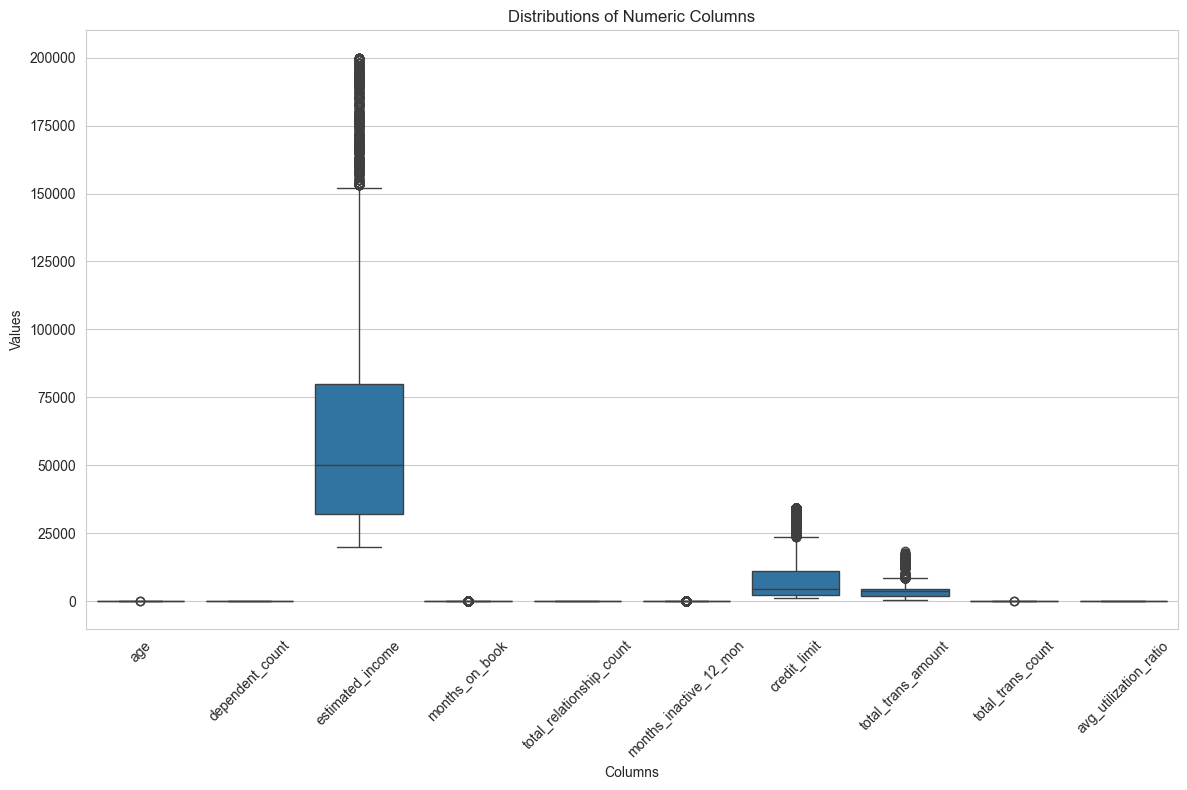

In [9]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot
columns_to_plot = ['age', 'dependent_count', 'estimated_income',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'credit_limit', 'total_trans_amount', 'total_trans_count',
       'avg_utilization_ratio']

# Melt the numeric_data to long format for seaborn
data_melted = numeric_data[columns_to_plot].melt(var_name='Columns', value_name='Values')

# Create the box plot
sns.boxplot(x='Columns', y='Values', data=data_melted)

# Set the title and labels
plt.title('Distributions of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


Initially, we generated a single box plot graph to show all numeric columns. However, this visualization wasn’t effective—columns with large value ranges, like `estimated_income`, overshadowed others, making it difficult to see distributions clearly. To fix this, we’ll break the plots into five subplots, allowing us to better see the unique characteristics of each column.

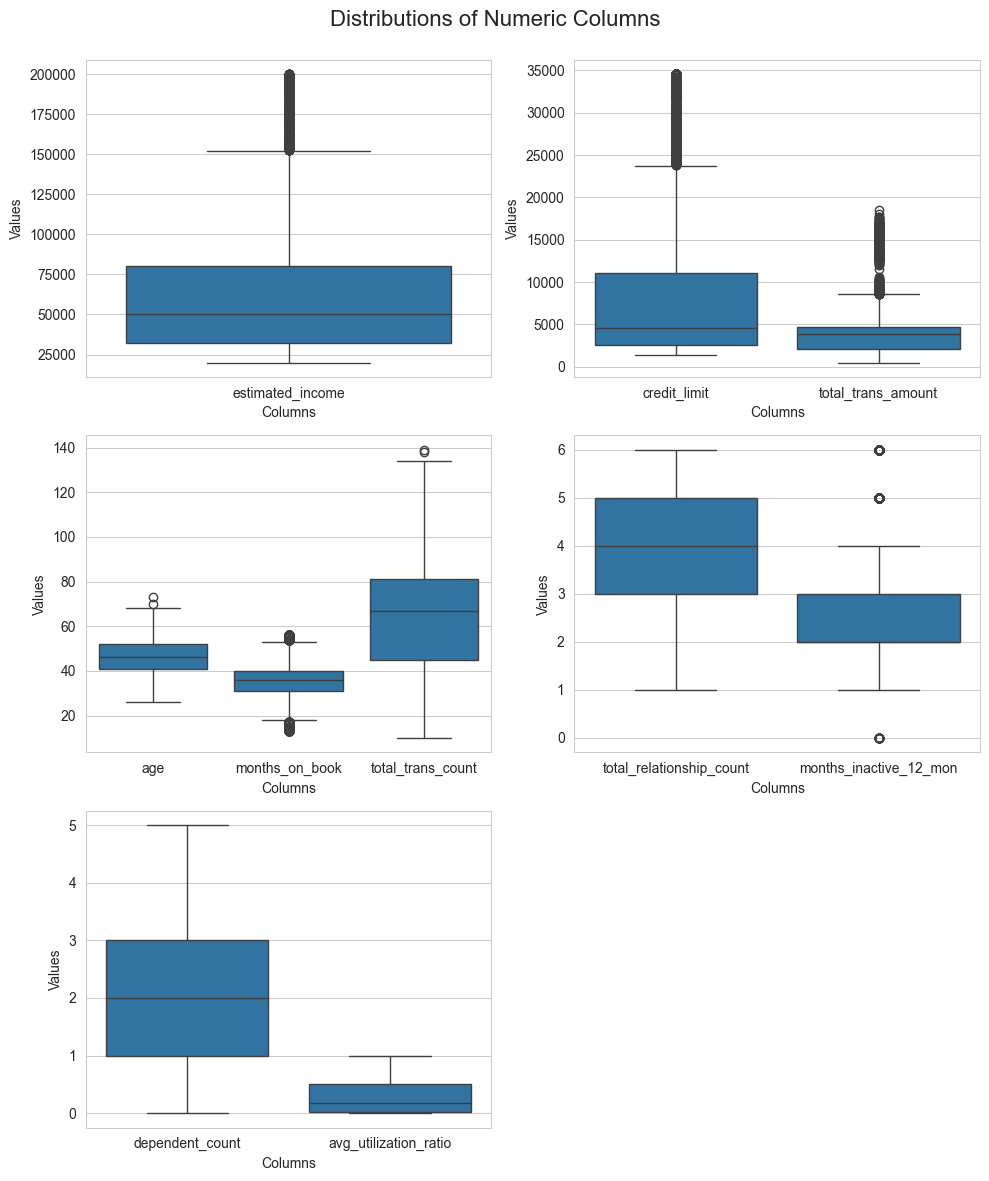

In [10]:
# separating the numerical columns
columns_to_plot1 = ['estimated_income']
data_melted1 = numeric_data[columns_to_plot1].melt(var_name='Columns', value_name='Values')

columns_to_plot2 = ['credit_limit', 'total_trans_amount']
data_melted2 = numeric_data[columns_to_plot2].melt(var_name='Columns', value_name='Values')


columns_to_plot3 = ['age', 'months_on_book', 'total_trans_count']
data_melted3 = numeric_data[columns_to_plot3].melt(var_name='Columns', value_name='Values')


columns_to_plot4 = ['total_relationship_count', 'months_inactive_12_mon']
data_melted4 = numeric_data[columns_to_plot4].melt(var_name='Columns', value_name='Values')


columns_to_plot5 = ['dependent_count', 'avg_utilization_ratio']
data_melted5 = numeric_data[columns_to_plot5].melt(var_name='Columns', value_name='Values')



fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Plotting the five boxplots
sns.boxplot(x='Columns', y='Values', data=data_melted1, ax=axs[0, 0])

sns.boxplot(x='Columns', y='Values', data=data_melted2, ax=axs[0, 1])

sns.boxplot(x='Columns', y='Values', data=data_melted3, ax=axs[1, 0])

sns.boxplot(x='Columns', y='Values', data=data_melted4, ax=axs[1, 1])

sns.boxplot(x='Columns', y='Values', data=data_melted5, ax=axs[2, 0])

# Hiding the unused subplot
axs[2, 1].axis('off')

# Adding overall title
fig.suptitle('Distributions of Numeric Columns', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, .98])
plt.show()

As noted earlier, `estimated_income` stands out with significantly higher values and several high outliers. Both `credit_limit` and `total_trans_amount` also show elevated values and long upper tails, although they aren't as extreme as `estimated_income`. The `age` column ranges mostly between 40 and 60, with a few outliers near 70. `months_on_book` centers below 40 but includes some outliers above and below that range.

The `total_trans_count` column has a dense central cluster with a couple of higher outliers. `total_relationship_count` mainly ranges between 3 and 5 and appears free of outliers. `months_inactive_12_mon` generally falls between 2 and 3, with some minor outliers on either end. Finally, both `dependent_count` and `avg_utilization_ratio` are on the lower end—`dependent_count` ranges from 1 to 3, while `avg_utilization_ratio` remains below 1. Neither of these shows any significant outliers.

These insights will be important to remember as we move forward.

### Distributions – Categorical

Now let’s shift focus to the categorical columns.

In [11]:
categorical_data = customers.drop(numeric_data.columns, axis=1)

In [12]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           10127 non-null  object
 1   education_level  10127 non-null  object
 2   marital_status   10127 non-null  object
dtypes: object(3)
memory usage: 237.5+ KB


To visualize the distributions of our categorical variables, we’ll use bar plots instead of box plots. Bar plots provide a clearer visual representation of how frequently each unique value appears in each column.

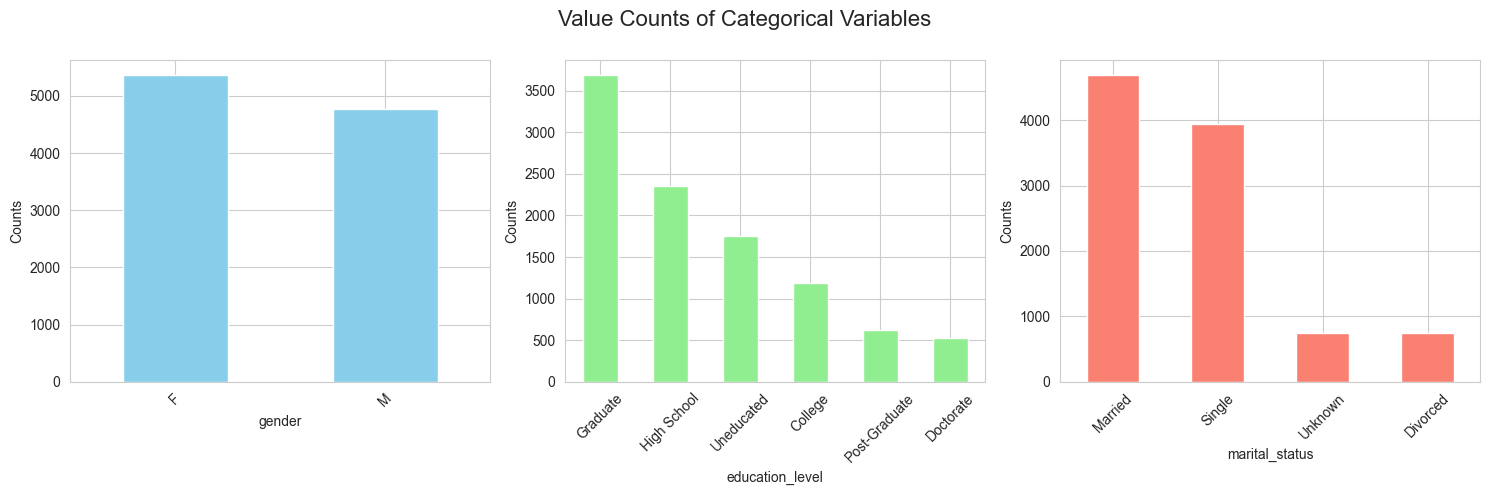

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot value counts for each categorical column
categorical_data['gender'].value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_xlabel('gender')
axs[0].set_ylabel('Counts')
axs[0].set_xticklabels(categorical_data['gender'].value_counts().index, rotation=45)

categorical_data['education_level'].value_counts().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_xlabel('education_level')
axs[1].set_ylabel('Counts')
axs[1].set_xticklabels(categorical_data['education_level'].value_counts().index, rotation=45)

categorical_data['marital_status'].value_counts().plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_xlabel('marital_status')
axs[2].set_ylabel('Counts')
axs[2].set_xticklabels(categorical_data['marital_status'].value_counts().index, rotation=45)

# Add overall title
fig.suptitle('Value Counts of Categorical Variables', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

From the graphs, we can see that the `gender` column contains more females than males. In the `education_level` column, 'Graduate' is the most common value, followed by 'High School'. The `marital_status` column shows that most clients are married, and among the rest, the majority are single. These distributions offer additional context and will help guide future modeling decisions.

### Feature Engineering

With our Exploratory Data Analysis (EDA) complete, we’re ready to prepare the data for our unsupervised machine learning model. Just as we did when generating the correlation map, we need to convert our categorical columns into numeric form.

Similar to how we transformed our data into numeric form for the correlation map, we're going to convert the categorical columns into numeric form again. However, this time, instead of converting them into boolean numeric form (consisting of forming new columns with either 1 or 0), we're going to replace each text value with a specific number, ranking its value or magnitude, and keep our current number of columns. The replacements we're going to make are as follows:

* `gender`

  * 'F' → 0
  * 'M' → 1
* `education_level`

  * 'Uneducated' → 0
  * 'High School' → 1
  * 'College' → 2
  * 'Graduate' → 3
  * 'Post-Graduate' → 4
  * 'Doctorate' → 5

As for the `marital_status` column, we can't rank its values in the same way as we can with education. It wouldn't be accurate to mark the 'Single' value as higher or lower than the 'Married' value, for example. Because of this, we will take the same approach as we did with the correlation data earlier, exchanging the column for several boolean numeric form columns.

In [14]:
customers_modif = customers.copy()

# defining our repacements as dictionaries
gender_replacements = {
    'F': 0,
    'M': 1
}

education_replacements = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}

# executing the replacements
customers_modif['gender'] = customers_modif['gender'].map(gender_replacements).astype('int64')
customers_modif['education_level'] = customers_modif['education_level'].map(education_replacements).astype('int64')

In [15]:
# creating numeric columns for each unique value in the marital_status column
dummies = pd.get_dummies(customers_modif['marital_status'], prefix='marital_status')
dummies = dummies.astype(int)

# droping the original marital_status column
customers_modif = customers_modif.drop('marital_status', axis=1)

# combining the remaining columns with the new dummy variable columns
customers_modif = pd.concat([customers_modif, dummies], axis=1)

In [16]:
customers_modif

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,0,0,1,0
10123,710638233,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,1,0,0,0
10124,716506083,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,0,1,0,0
10125,717406983,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,0,0,0,1


In [17]:
customers_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
 13  marital_status_Divorced   10127 non-null  int64  
 14  marita

### Scaling the Data

With all columns now in numeric format, we’re ready for the final step in preparing our dataset for machine learning. As noted during our distribution analysis, the range of values across columns varies significantly. For instance, `estimated_income` values may reach around 50,000, while `dependent_count` values often hover near 2. Though these differences make sense given the nature of each column, they can introduce bias or imbalance when training a model.

To resolve this, we’ll use scikit-learn’s `StandardScaler()` to normalize all numerical data, bringing it onto a comparable scale. We’ll also remove the `customer_id` column, as it doesn’t hold any meaningful information about client behavior or segmentation.

In [18]:
# droping the customer_id column
customers_modif = customers_modif.drop('customer_id', axis=1)

In [19]:
# scaling the data to comparable scales
scaler = StandardScaler()
scaler.fit(customers_modif)
customers_scaled = scaler.transform(customers_modif)
customers_scaled = pd.DataFrame(customers_scaled)

With these steps complete, our dataset is now fully prepared for machine learning.

### Choosing the Number of Clusters

Because we’re using unsupervised learning, we must determine the optimal number of clusters for segmentation. This isn’t a straightforward process—it typically involves trial and error. The process includes:

1. Fitting a model with a selected number of clusters
2. Calculating the inertia value for that model

After repeating this for several different cluster counts, we plot the results as an Elbow Curve, which helps us identify the point where increasing the number of clusters yields diminishing improvements in inertia. 

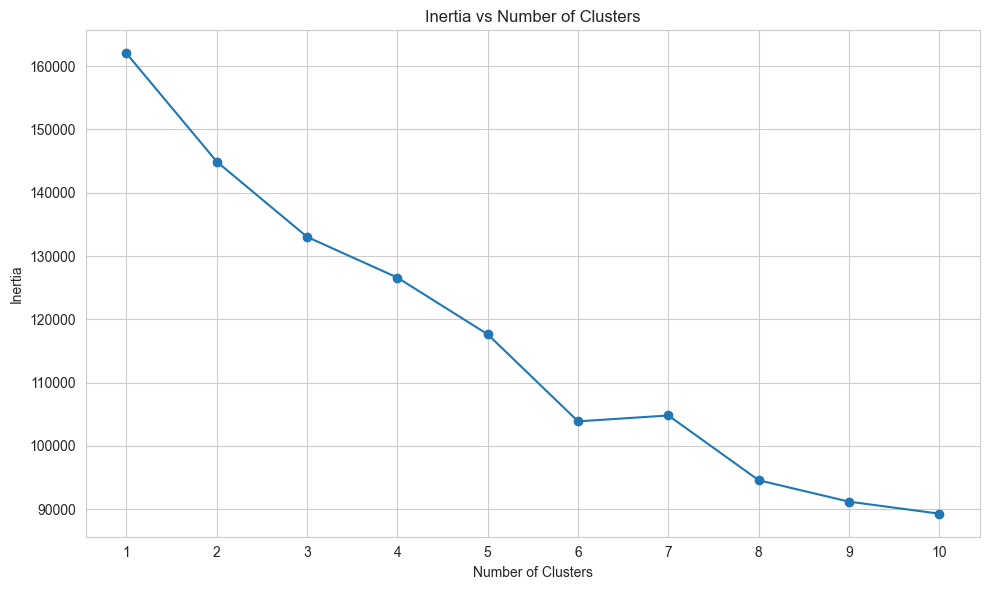

In [20]:
# calculating the inertia value for each number of clusters
inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    cluster = model.fit_predict(customers_scaled)
    inertias.append(model.inertia_)

# plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

Based on this analysis, we selected 6 clusters, as the curve flattens out beyond that point.

Once the clusters have been formed, we'll create a new column in our original dataframe to indicate which cluster each client belongs to. This allows us to begin analyzing the unique characteristics of each group.

In [21]:
# performing the unsupervised machine learning on our dataset with 6 clusters
model = KMeans(n_clusters=6)
clusters = model.fit_predict(customers_scaled)

In [22]:
# creating new column to show what cluster each row belongs to
customers['CLUSTER'] = clusters + 1
customers

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,3
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,1
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,3
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,5
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,6
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,4
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,4
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,5


In [23]:
customers['CLUSTER'].value_counts()

CLUSTER
4    2758
1    2538
3    1751
2    1441
6     903
5     736
Name: count, dtype: int64

Before diving into averages, it's worth noting the size of each cluster. Cluster 4 contains the largest number of clients, while Cluster 5 has the fewest. To deepen our understanding, we’ll generate bar plots for each numerical column to compare their average values across clusters. The more patterns and trends we uncover, the better equipped we’ll be to describe and differentiate each cluster for the company.

### Analysis

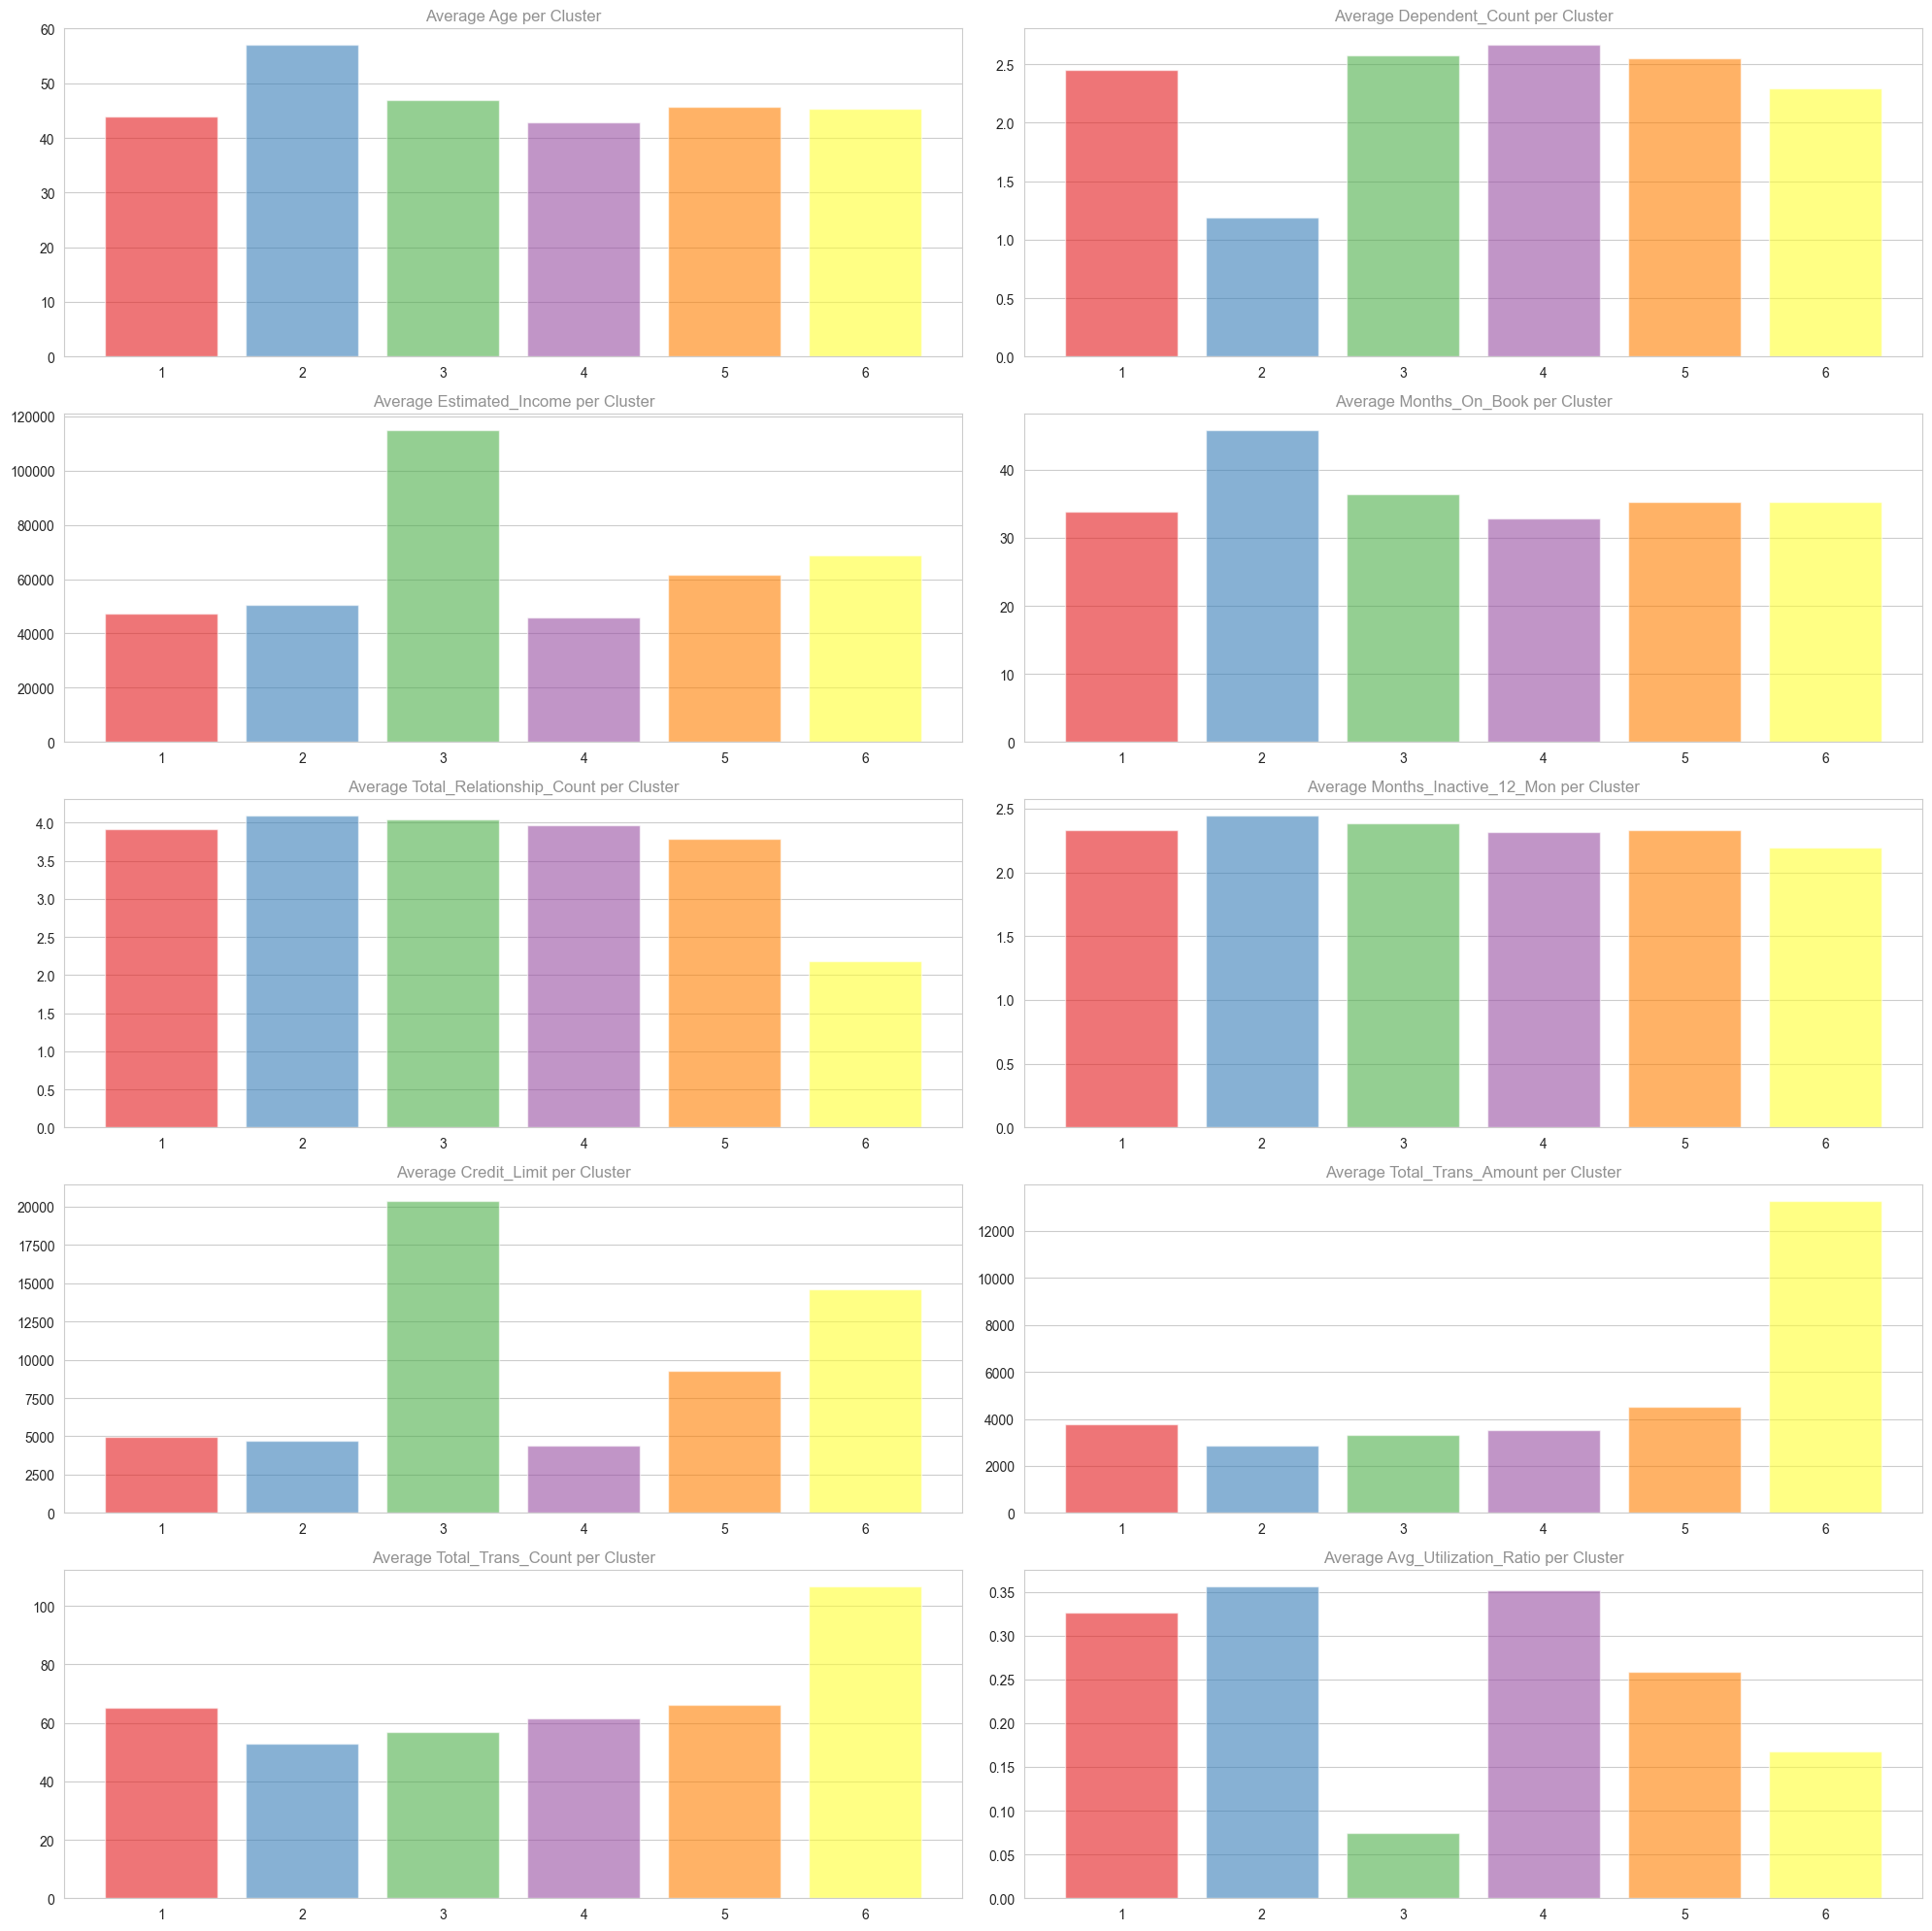

In [24]:
# separating the numeric data
numeric = customers.select_dtypes(include=['number']).drop(['customer_id', 'CLUSTER'], axis=1)
numeric_columns = numeric.columns

# plotting the average values per cluster
fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = customers.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

### Cluster Averages and Initial Insights

Below are key insights based on the average values of various numerical features in each cluster:

* The average age across all clusters is above 40
* Cluster 4 shows a slightly higher average `dependent_count`
* Cluster 3 has the highest `estimated_income` and `credit_limit`
* All clusters have `months_on_book` averages above 30
* Cluster 6 has the lowest `total_relationship_count`
* All clusters exceed 2.0 in `months_inactive_12_mon`
* Cluster 6 stands out in both `total_trans_amount` and `total_trans_count`
* Cluster 3 has the lowest `avg_utilization_ratio`

Let's continue exploring our clusters by examining the numeric columns. Previously, in our Exploratory Data Analysis, we noticed that several columns had strong correlations with one another. Next, we will generate four scatter plots of these strong relationships to examine how the clusters are distributed across each column.

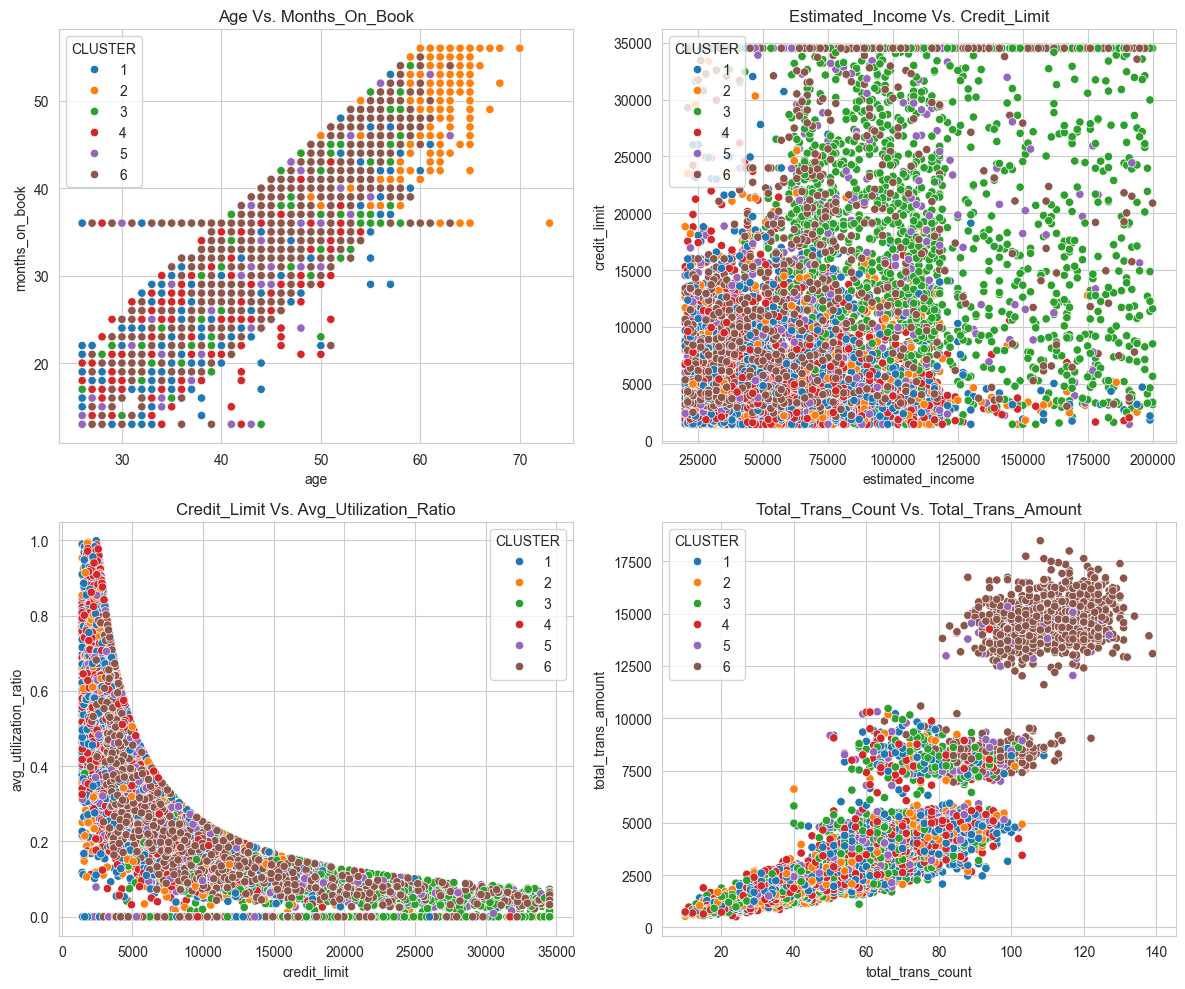

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Create scatter plots for strong relationships
sns.scatterplot(data=customers, x='age', y='months_on_book', hue='CLUSTER', palette='tab10', ax=axs[0, 0])
axs[0, 0].set_title('Age Vs. Months_On_Book')
axs[0, 0].grid(True)

sns.scatterplot(data=customers, x='estimated_income', y='credit_limit', hue='CLUSTER', palette='tab10', ax=axs[0, 1])
axs[0, 1].set_title('Estimated_Income Vs. Credit_Limit')
axs[0, 1].grid(True)

sns.scatterplot(data=customers, x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', palette='tab10', ax=axs[1, 0])
axs[1, 0].set_title('Credit_Limit Vs. Avg_Utilization_Ratio')
axs[1, 0].grid(True)

sns.scatterplot(data=customers, x='total_trans_count', y='total_trans_amount', hue='CLUSTER', palette='tab10', ax=axs[1, 1])
axs[1, 1].set_title('Total_Trans_Count Vs. Total_Trans_Amount')
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### Exploring Key Numeric Relationships

To further explore how the clusters distribute across key variables, we created scatter plots for the following relationships:

#### Age vs. Months on Book

* **Cluster 1:** Mostly ages 30–55, months\_on\_book between 20–50
* **Cluster 2:** Ages 50–65, with months\_on\_book between 35–55
* **Cluster 3:** Ages 30–60, months\_on\_book ranges from 25–50
* **Cluster 4:** Most clients fall between ages 30–55 and months\_on\_book 20–45
* **Cluster 5:** Concentration of values around ages 40–50, months\_on\_book 25–50
* **Cluster 6:** Clustered around ages 39–51 and months\_on\_book 25–51

#### Estimated Income vs. Credit Limit

* **Cluster 1:** Mostly in the lower-left corner (\~\\$15k credit limit, \~\$100k income)
* **Cluster 2:** Primarily between \\$0–10k credit limit, \$0–100k income
* **Cluster 3:** Clustered around \\$50k–125k income and \$5k–35k credit limit
* **Cluster 4:** Values grouped in \\$0–10k credit limit, \$0–100k income
* **Cluster 5:** Similar to Cluster 4, with a few high credit limit outliers
* **Cluster 6:** Primarily in \\$0–75k income and \$0–25k credit limit ranges, with some higher outliers

#### Credit Limit vs. Avg Utilization Ratio

* **Cluster 1:** Spread across full `avg_utilization_ratio` range and \$0–150k credit limit
* **Cluster 2:** Mostly between 0.1–1.0 utilization and \$0–10k credit limit
* **Cluster 3:** Clustered around \$10k–35k credit limit and 0.0–0.25 utilization
* **Cluster 4:** Spread across the entire utilization axis and \$0–15k credit limit
* **Cluster 5:** Loosely scattered, with concentration at \$0–10k credit limit and 0.2–0.8 utilization
* **Cluster 6:** Dense grouping around low utilization and \$0–20k credit limit

#### Total Transaction Count vs. Total Transaction Amount

* **Cluster 1:** Clustered around 0–6,000 total amount and 0–100 transaction count
* **Cluster 2:** Mostly in the 0–6,000 amount and 0–90 count range
* **Cluster 3:** Large cluster around 0–6,000 amount and 0–90 count, with a smaller group at \~8,000 amount and 80 count
* **Cluster 4:** Similar to Cluster 3, with fewer outliers above 6,000
* **Cluster 5:** Two main groups: one around 0–6,000 amount, another between 6,000–16,000 with higher transaction counts
* **Cluster 6:** Two groups—one around 90–130 transactions and 12,000–18,000 amount, another around 70–120 and 0–10,000

To arrive at these conclusions, I examined scatter plots for each cluster individually. While those individual plots aren’t shown here to save space, their findings are reflected in the combined plots included above.

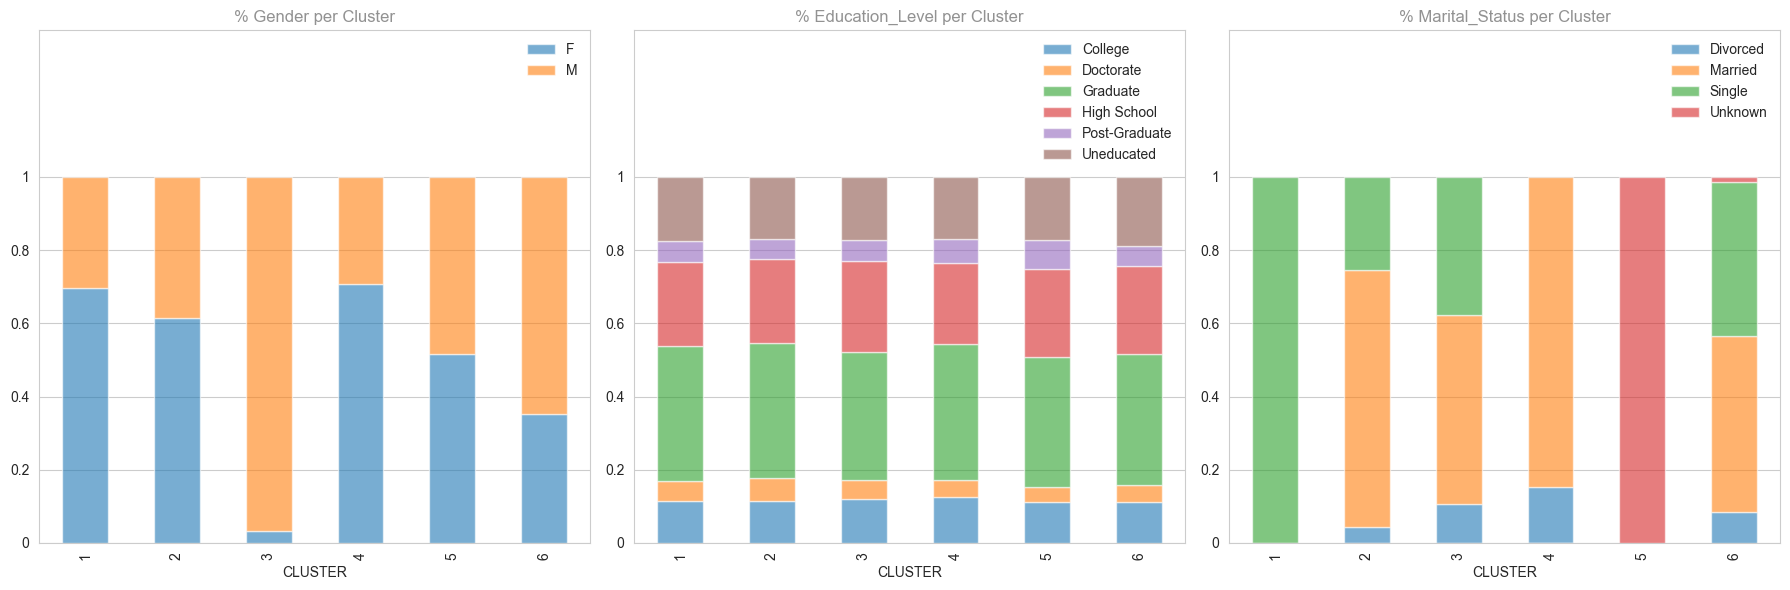

In [26]:
# selecting the categorical data
categorical_columns = customers.select_dtypes(include=['object'])

# plotting percent distribution bar graphs per cluster
fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_columns):
    plot_df = pd.crosstab(index=customers['CLUSTER'], columns=customers[col], values=customers[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticks(labels)
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

### Analyzing Categorical Features

Next, we examined how the categorical features are distributed across clusters using percentage-based visualizations.

#### Gender Distribution

* **Cluster 1 & 4:** \~70% female
* **Cluster 2:** \~60% female
* **Cluster 5:** \~50% female
* **Cluster 6:** \~35% female
* **Cluster 3:** <10% female

#### Education Level

All clusters show similar distributions in the `education_level` column.

#### Marital Status

* **Cluster 1:** 100% single
* **Cluster 5:** 100% unknown
* **Cluster 2:** \~10% divorced, \~70% married, \~30% single
* **Cluster 3:** \~10% divorced, \~50% married, \~40% single
* **Cluster 6:** \~10% divorced, \~50% married, \~40% single, small portion unknown


### Final Cluster Profiles

In this final section of our project, we will outline the distinct characteristics of each cluster. This will provide our company with valuable insights when deciding how to interact with customers from each cluster.

#### Cluster 1

* Avg Age: 43
* Avg Income: \$47,349
* Credit Limit: \$4,992
* Avg Transactions: 65
* Utilization: Moderate
* Gender: 70% Female
* Marital Status: 100% Single
* **Summary:** This cluster includes mostly middle-aged, single women with modest incomes who use their cards frequently. Consider raising their credit limits to encourage continued engagement.


#### Cluster 2

* Avg Age: 57 (oldest group)
* Avg Income: \$50,691
* Low Dependent Count
* Credit Limit: \$4,739
* Avg Transactions: 52
* Utilization: High
* Gender: 60% Female
* Marital Status: \~65% Married, \~25% Single, \~10% Divorced
* **Summary:** These clients are older, mostly married, and frequently use their credit cards despite lower transaction counts. Consider offering incentives or benefits for increased spending.


#### Cluster 3

* Avg Age: 46
* Highest Avg Income: \$115,096
* Highest Credit Limit: \$20,405
* Avg Transactions: 56
* Utilization: Very Low
* Gender: \~90% Male
* Marital Status: \~51% Married, \~39% Single, \~10% Divorced
* **Summary:** High-income, middle-aged men with large credit limits but low card usage. These clients could be encouraged to make better use of their credit lines.


#### Cluster 4

* Largest Cluster
* Avg Age: 42 (youngest group)
* Lowest Income: \$45,802
* Lowest Tenure: 32 months
* Credit Limit: \$4,407
* Avg Transactions: 61
* Utilization: High
* Gender: 70% Female
* Marital Status: 85% Married, 15% Divorced
* **Summary:** Young, mostly married women with low income and credit limits but high spending. Consider offering financial education or budget tools to encourage smarter usage.


#### Cluster 5

* Smallest Cluster
* Avg Age: 45
* Avg Income: \$61,641
* Credit Limit: \$9,264
* Avg Transactions: 66
* Utilization: Medium
* Gender: \~50% Female / \~50% Male
* Marital Status: 100% Unknown
* **Summary:** Balanced gender, moderate income and card activity, but no marital status data. Consider gathering more demographic information to better tailor services.


#### Cluster 6

* Avg Age: 45
* Avg Income: \$68,903
* Fewest Customer Interactions (avg 2)
* Credit Limit: \$14,631
* Highest Transaction Count: 106
* Highest Transaction Amount: \$13,301
* Utilization: Low
* Gender: 65% Male
* Marital Status: \~49% Married, \~40% Single, \~10% Divorced, 1% Unknown
* **Summary:** High-spending, middle-aged men with few interactions with the company. Encourage more communication and explore ways to support continued card usage.